In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
 
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
 
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

**Decision Boundary**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


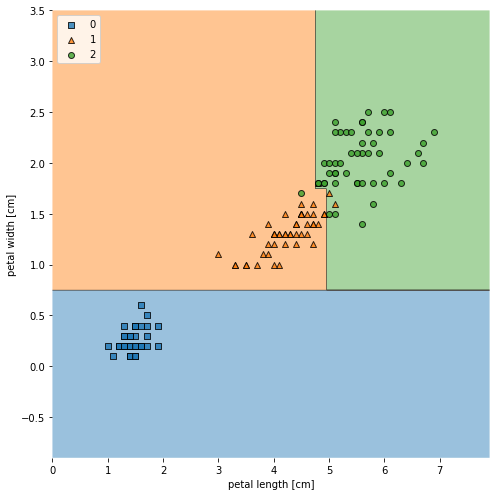

In [2]:
from mlxtend.plotting import plot_decision_regions
 
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
 
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_combined, y_combined, clf=clf_tree)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Confusion Matrix** 

In [3]:
from sklearn import metrics
ypred = clf_tree.predict(X_test)
cm = metrics.confusion_matrix(ypred, y_test)
print(cm)

[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]


In [4]:
score=metrics.accuracy_score(ypred, y_test)
print(score)

0.9777777777777777


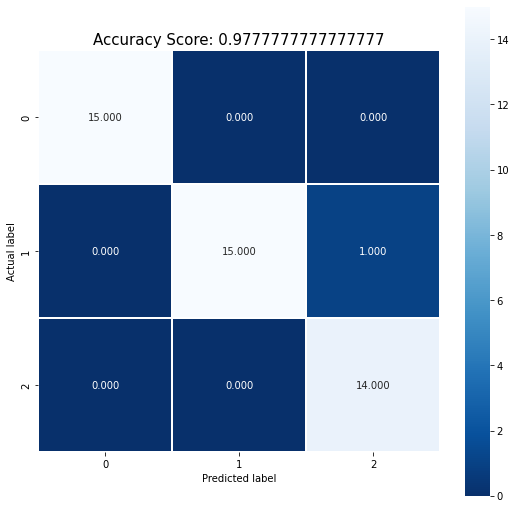

In [5]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);